In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline
import numpy as np
import seaborn as sns

In [102]:
data = pkl.load(open('data/output/BaseProblem/Multi_Zeta0.3_eval.pkl', "rb"))

In [103]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Excess Load'] = data['Total Load']-5
data['Above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)
data['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [104]:
data['Daily Excess']

0           NaN
1      5.626045
2      6.687588
3      4.382331
4      4.249831
         ...   
740         NaN
741         NaN
742         NaN
743         NaN
744         NaN
Name: Daily Excess, Length: 745, dtype: float64

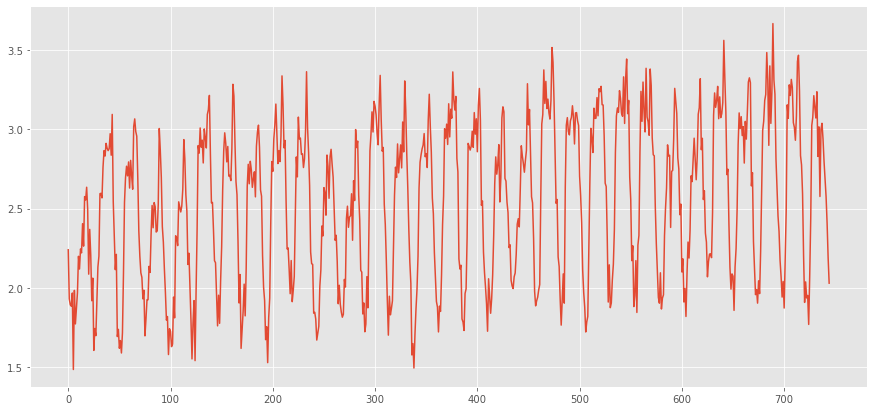

In [25]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [105]:
data['above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)

In [106]:
sum(data['above'])

324.1563660206969

In [107]:
data['above'].mean()

0.43510921613516323

In [108]:
data['Rewards'].sum()

-1192.1052988884499

In [109]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [110]:
data_base = pkl.load(open('data/output/BaseProblem/Multi_Zeta0.3base_eval.pkl', "rb"))

In [111]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 5)*(data_base['Total Load']-5)
data_base['Excess Load'] = data_base['Total Load']-5
data_base['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [112]:
one_week = data.iloc[:,:]

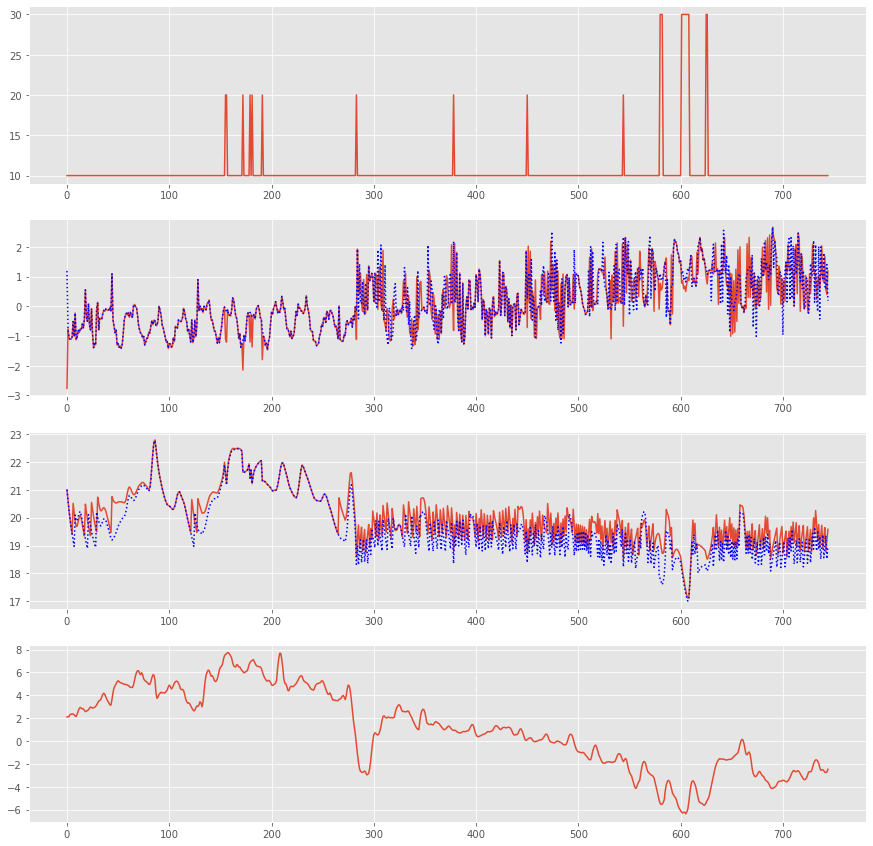

In [113]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Excess Load'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
#one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Excess Load'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

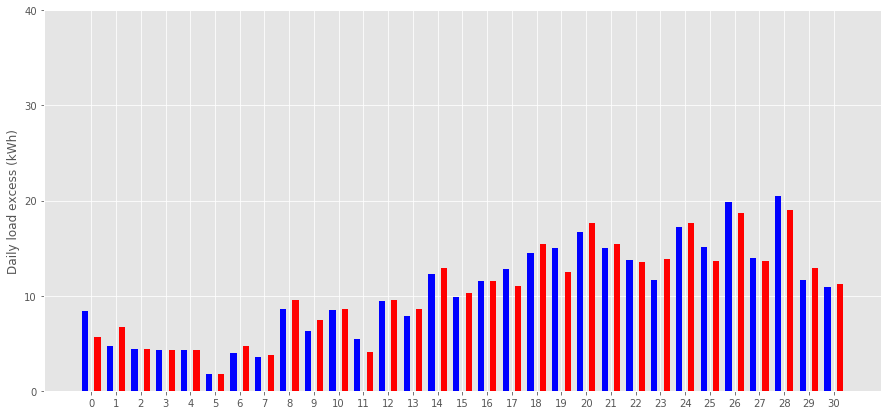

In [114]:
N=len(data_base.dropna())
ind = np.arange(N)
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, data_base['Daily Excess'].dropna(), color = 'b', width = 0.25, label = 'Base with static price')
axs.bar(ind + 0.25, data['Daily Excess'].dropna(), color = 'r', width = 0.25, label = 'Dynamic prices with RL')
axs.set_ylabel('Daily load excess (kWh)')
axs.set_yticks(np.arange(0, 50, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)

In [36]:
sum(data['Total Load'] >= 5)

347

In [37]:
data_base['Rewards'].sum()

-2658.699720810283

In [38]:
sum(data_base['Above'])

495.4429260533392

In [28]:
data_base['above'].mean()

1.545624445117325

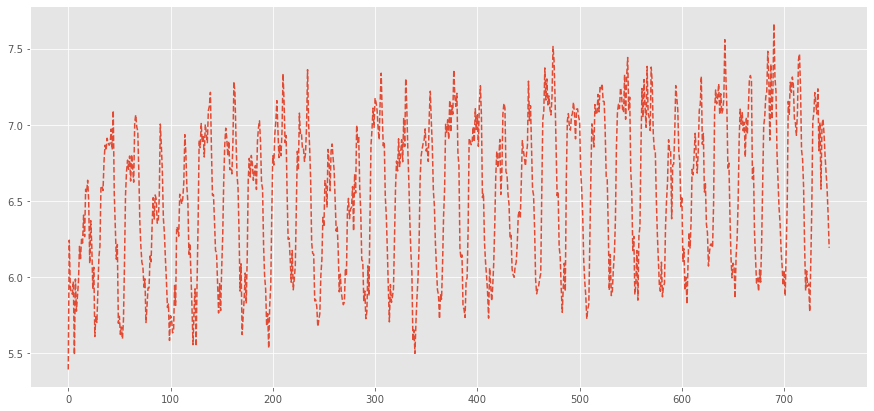

In [29]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax, linestyle='--')

In [30]:
sum(data_base['Total Load'] >= 5)

745

In [115]:
data = pkl.load(open('data/output/RLBuildings/Lowerload/9792641_dynamic_True_rewards_dqn.pkl', "rb"))

In [116]:
data[-1]

{'NUM_EPISODES': 1500,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 10,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0}

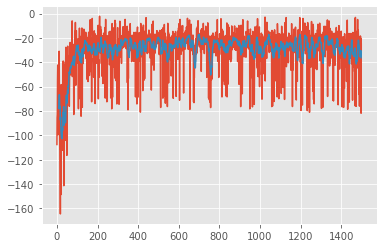

In [117]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

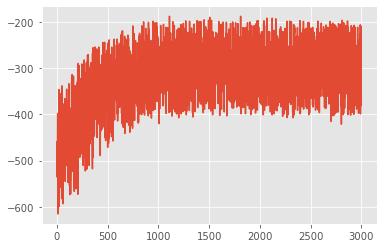

In [19]:
plt.figure()
plt.plot(data_rms[:-1])

# Buildings with RL agents

In [43]:
data = pkl.load(open('data/output/RLBuildings/Lowerload/9798623_dynamic_True_rewards_dqn.pkl', "rb"))

In [44]:
data[-1]

{'NUM_EPISODES': 1500,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 10,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0.1}

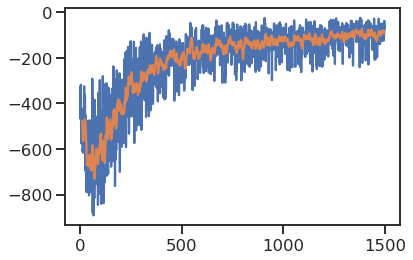

In [45]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

# Evaluation on January

In [104]:
data = pkl.load(open("data/output/RLBuildings/Lowerload/Multi_2_Buildings_Zeta0.1_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Deviation from load limit'] = data['Total Load'] - 4
data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data.index = data['Date']

In [105]:
data['Above'] = (data['Total Load'] >= 4)*(data['Total Load']-4)
sum(data['Above'])

869.7352362430715

In [129]:
data['Heating Load'] = data['Total Load'] - data['Base Loads']

In [130]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Actions 1,Actions 2,Ambient Temperatures,Actions,Rewards,Total Load,Total Price,Base Loads,Deviation from load limit,Date,Day,Above,Chosen Price,Daily Excess,Heating Load
Date,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,21.048813,20.917023,1.125480,1.115002,0.000000,0.000000,2.118,0.0,0.000000,2.240482,0.000000,2.240482,-1.759518,2014-01-01 00:00:00,1,-0.000000,10,NaN,4.440892e-16
2014-01-01 01:00:00,21.638201,20.326252,1.090279,0.940144,0.380043,0.920782,2.118,0.0,-2.329695,4.583457,0.045835,2.030423,0.583457,2014-01-01 01:00:00,1,0.583457,10,NaN,2.553034e+00
2014-01-01 02:00:00,21.432899,19.927494,0.760113,0.847293,0.476112,0.594353,2.147,0.0,-1.958390,4.171354,0.041714,1.607406,0.171354,2014-01-01 02:00:00,1,0.171354,10,NaN,2.563948e+00
2014-01-01 03:00:00,21.437859,19.687778,0.999131,0.775026,0.514285,0.657964,2.324,0.0,-1.760666,3.951905,0.039519,1.774156,-0.048095,2014-01-01 03:00:00,1,-0.000000,10,NaN,2.177748e+00
2014-01-01 04:00:00,21.437733,19.550934,0.818620,0.704564,0.543805,0.655248,2.344,1.0,-1.959208,4.172262,0.041723,1.523183,0.172262,2014-01-01 04:00:00,1,0.172262,20,NaN,2.649078e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 20:00:00,20.115205,18.524187,1.317177,1.368474,0.793051,0.859133,-2.605,4.0,-4.290636,6.263944,0.313197,2.685651,2.263944,2014-01-31 20:00:00,31,2.263944,50,NaN,3.578293e+00
2014-01-31 21:00:00,20.092840,18.492292,1.312423,1.424184,0.807913,0.873418,-2.735,4.0,-4.149536,6.048313,0.302416,2.736606,2.048313,2014-01-31 21:00:00,31,2.048313,50,NaN,3.311706e+00
2014-01-31 22:00:00,20.079028,18.471103,1.049033,1.270185,0.812679,0.877682,-2.760,4.0,-4.243891,6.117329,0.305866,2.319219,2.117329,2014-01-31 22:00:00,31,2.117329,50,NaN,3.798111e+00


In [107]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    #return x*50+10
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [108]:
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [109]:
data['Above'].mean()

1.1674298473061362

In [131]:
data_base = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_2_Buildings_Zeta0.130base_eval.pkl', "rb"))

In [132]:
data_base_10 = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_RL_jan_Zeta0.1_base_10base_eval.pkl', "rb"))

In [133]:
data_base_tou = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_2_Buildings_Zeta0.1_ToU_base_eval.pkl', "rb"))

In [134]:

data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 4)*(data_base['Total Load']-4)
data_base['Deviation from load limit'] = data_base['Total Load']-4
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base.index = data_base['Date']
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()
data_base['Heating Load'] = data_base['Total Load'] - data_base['Base Loads']

In [135]:
data_base_10['Total Load'] = data_base_10['Total Load']*1000
data_base_10['Base Loads 1'] = data_base_10['Base Loads 1']*1000
data_base_10['Base Loads 2'] = data_base_10['Base Loads 2']*1000
data_base_10['Base Loads'] = data_base_10['Base Loads 1'] + data_base_10['Base Loads 2']
data_base_10['Above'] = (data_base_10['Total Load'] >= 4)*(data_base_10['Total Load']-4)
data_base_10['Deviation from load limit'] = data_base_10['Total Load']-4
data_base_10['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base_10.index = data_base_10['Date']
data_base_10['Day'] = data_base_10['Date'].dt.day
data_base_10['Heating Load'] = data_base_10['Total Load'] - data_base_10['Base Loads']

In [136]:
data_base_tou['Total Load'] = data_base_tou['Total Load']*1000
data_base_tou['Base Loads 1'] = data_base_tou['Base Loads 1']*1000
data_base_tou['Base Loads 2'] = data_base_tou['Base Loads 2']*1000
data_base_tou['Base Loads'] = data_base_tou['Base Loads 1'] + data_base_tou['Base Loads 2']
data_base_tou['Above'] = (data_base_tou['Total Load'] >= 4)*(data_base_tou['Total Load']-4)
data_base_tou['Deviation from load limit'] = data_base_tou['Total Load']-4
data_base_tou['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base_tou.index = data_base_tou['Date']
data_base_tou['Day'] = data_base_tou['Date'].dt.day
data_base_tou['Heating Load'] = data_base_tou['Total Load'] - data_base_tou['Base Loads']

In [29]:
data_base_10.groupby('Day')['Above'].sum()

Day
1     14.097164
2     16.332672
3     10.547844
4      6.265298
5      7.574374
6     16.396541
7      6.939058
8      6.734686
9     12.320137
10    12.588179
11    10.656376
12    18.857890
13    39.873396
14    21.468399
15    23.982970
16    32.062914
17    31.206424
18    27.157296
19    30.230084
20    39.218898
21    38.851959
22    44.011265
23    48.702307
24    51.017008
25    52.653499
26    59.626219
27    58.658524
28    42.498494
29    59.043215
30    58.604389
31    51.983730
Name: Above, dtype: float64

In [137]:
one_week = data.iloc[17*24:24*24,:]

Text(0.5, 1.0, 'Ambient temperature')

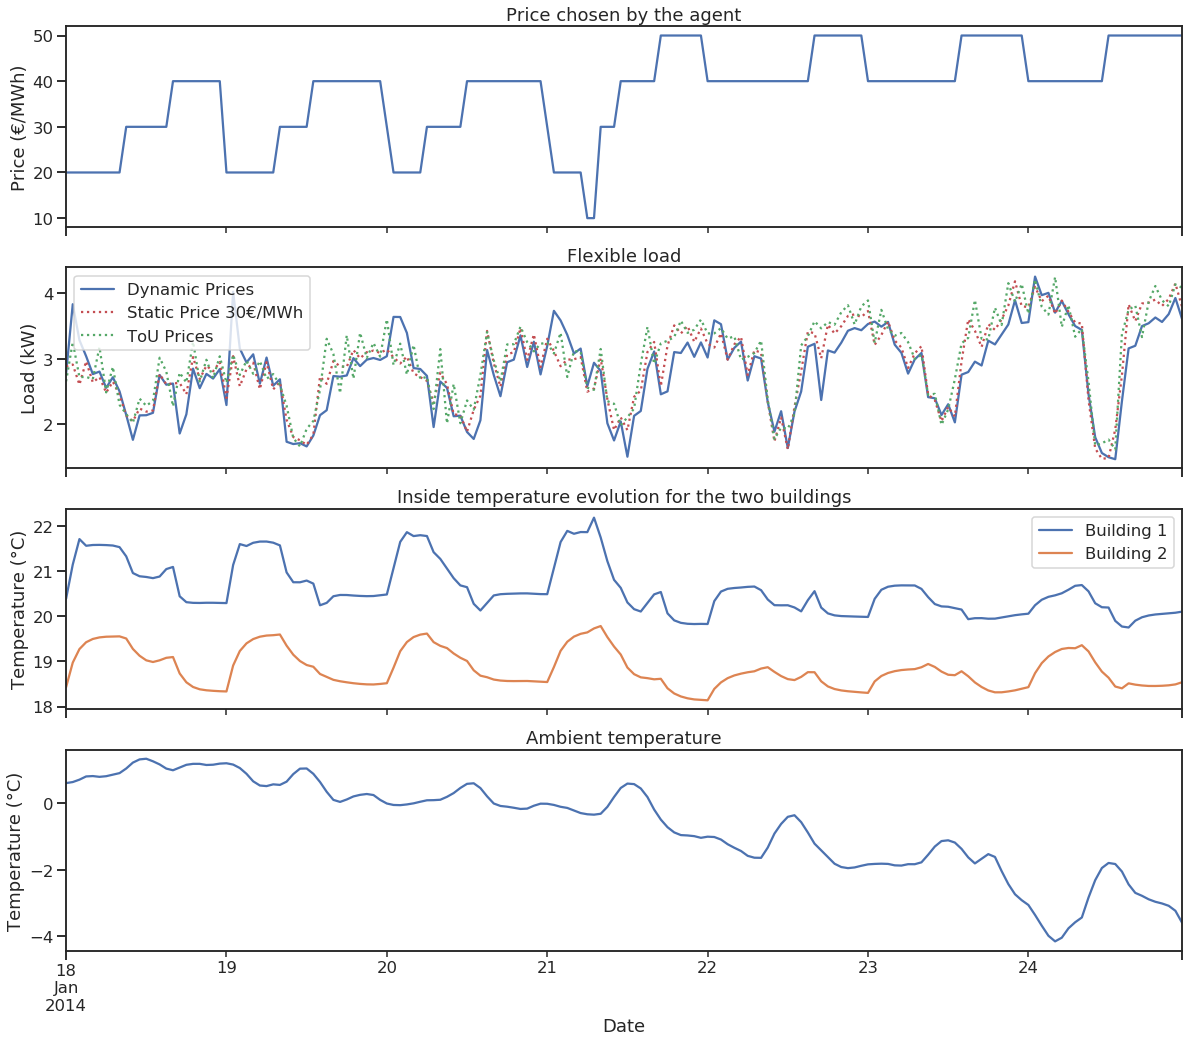

In [148]:
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Heating Load'].plot(ax=ax[1])
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

data_base.iloc[17*24:24*24,:]['Heating Load'].plot(ax=ax[1],c='r', linestyle = 'dotted')
data_base_10.iloc[17*24:24*24,:]['Heating Load'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Dynamic Prices", "Static Price 30€/MWh", "ToU Prices"])
ax[1].set_ylabel('Load (kW)')
ax[1].set_title('Flexible load')

one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2])
ax[2].legend(["Building 1", "Building 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two buildings')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
#plt.savefig('data/output/RLBuildings/two_buildings_zoom_eval.png',bbox_inches='tight')

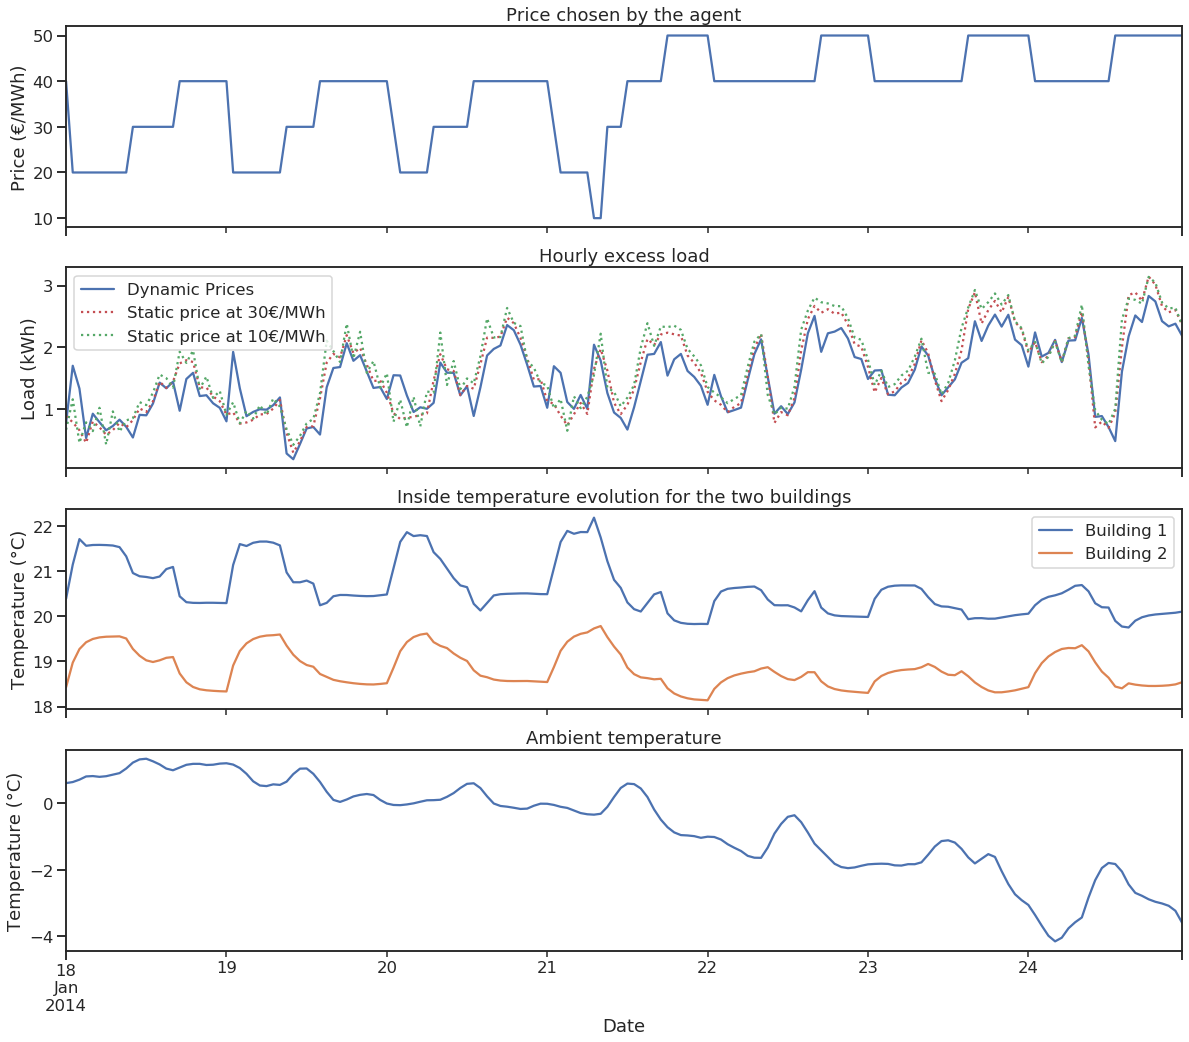

In [25]:
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Deviation from load limit'].plot(ax=ax[1])
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

data_base.iloc[17*24:24*24,:]['Deviation from load limit'].plot(ax=ax[1],c='r', linestyle = 'dotted')
data_base_10.iloc[17*24:24*24,:]['Deviation from load limit'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Dynamic Prices", "Static price at 30€/MWh", "Static price at 10€/MWh"])
ax[1].set_ylabel('Load (kWh)')
ax[1].set_title('Hourly excess load')

one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2])
ax[2].legend(["Building 1", "Building 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two buildings')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
#plt.savefig('data/output/RLBuildings/two_buildings_zoom_eval.png',bbox_inches='tight')

## Evaluation against baselines

### In terms of load

In [141]:
model_load = data['Heating Load'].sum()
static_price_load = data_base['Heating Load'].sum()
tou_load = data_base_tou['Heating Load'].sum()

In [142]:
model_load

1938.0147193525713

In [143]:
static_price_load

1963.1704235041416

In [144]:
tou_load

1919.9901701474469

### In terms of price

In [124]:
model_paid_price = data['Total Price'].sum()
static_paid_price = data_base['Total Price'].sum()
tou_paid_price = data_base_tou['Total Price'].sum()

In [125]:
model_paid_price

121.89369870730273

In [127]:
static_paid_price

115.63893820986051

In [128]:
tou_paid_price

142.234798271082

### In terms of temperature discomfort

In [46]:
data['Temperature Deviation 1'] = data['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data['Temperature Deviation 2'] = data['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [50]:
data_base_tou['Temperature Deviation 1'] = data_base_tou['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base_tou['Temperature Deviation 2'] = data_base_tou['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [54]:
data_base['Temperature Deviation 1'] = data_base['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base['Temperature Deviation 2'] = data_base['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [205]:
sum(data_base['Above'])

898.1566305275743

In [206]:
data_base['Above'].mean()

1.2055793698356705

In [207]:
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-02-11-00:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [208]:
data_base['Daily Excess']

0            NaN
1      10.624495
2      14.518929
3       8.924391
4       5.604652
         ...    
740          NaN
741          NaN
742          NaN
743          NaN
744          NaN
Name: Daily Excess, Length: 745, dtype: float64

In [28]:
data_base['Daily Excess'].dropna()

Series([], Name: Daily Excess, dtype: float64)

In [37]:
list(base_30_excess.values)

[12.049263921970233,
 14.59189196567636,
 9.082406382138387,
 5.559985329933703,
 6.749106983266017,
 14.649753577808934,
 5.784340071182257,
 5.733452237094336,
 11.113183869342478,
 10.747889226239451,
 9.538782694424597,
 16.849158940062683,
 38.14520483148541,
 19.88568756592261,
 22.053354670047334,
 30.05542207408009,
 29.278784090620654,
 25.407324411651487,
 28.364871616727633,
 37.13017419028773,
 36.37878554994157,
 41.40424624916815,
 46.41227520604849,
 50.14977778860933,
 51.73583057429066,
 58.75717613683168,
 56.13125652588146,
 40.254540532590944,
 57.97513766321427,
 56.595997898159894,
 49.591567752875704]

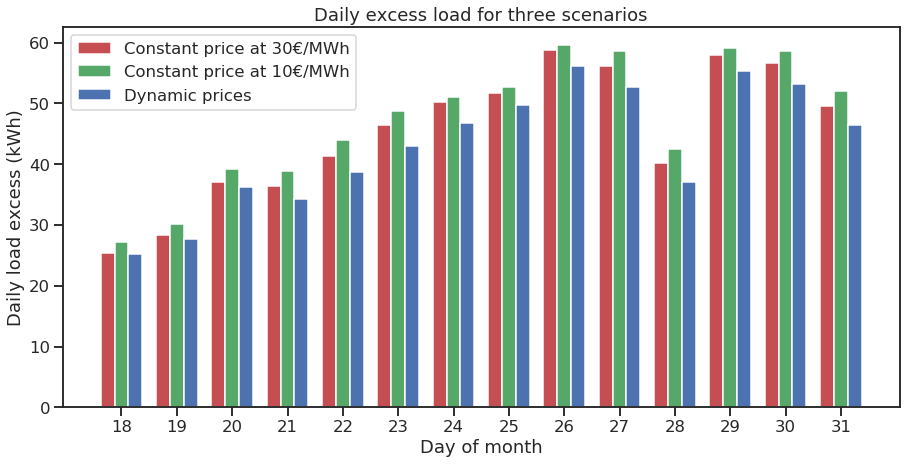

In [27]:
base_30_excess = data_base.groupby('Day')['Above'].sum().values[17:]
base_10_excess = data_base_10.groupby('Day')['Above'].sum().values[17:]
model_excess = data.groupby('Day')['Above'].sum().values[17:]

N=len(base_30_excess)
ind = np.arange(N) + 18
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, base_30_excess, color = 'r', width = 0.25)
axs.bar(ind ,base_10_excess , color = 'g', width = 0.25)
axs.bar(ind + 0.25,model_excess , color = 'b', width = 0.25)
axs.legend(['Constant price at 30€/MWh', 'Constant price at 10€/MWh', 'Dynamic prices'])
axs.set_ylabel('Daily load excess (kWh)')
axs.set_xlabel('Day of month')
axs.set_title('Daily excess load for three scenarios')
axs.set_yticks(np.arange(0, 70, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)
plt.savefig('data/output/RLBuildings/load_eval_two_buildings.png',bbox_inches='tight')

# Policy evaluation

In [2]:
policy_data = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_RL_Zeta0.1policy_eval.pkl', 'rb'))
policy_data

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions
0,18.0,18.0,-5.0,0,0.0,3.0
1,18.0,18.0,-5.0,1,0.0,4.0
2,18.0,18.0,-5.0,2,0.0,4.0
3,18.0,18.0,-5.0,3,0.0,4.0
4,18.0,18.0,-5.0,4,0.0,4.0
...,...,...,...,...,...,...
8639995,21.8,21.8,4.8,19,3.4,3.0
8639996,21.8,21.8,4.8,20,3.4,3.0
8639997,21.8,21.8,4.8,21,3.4,3.0
8639998,21.8,21.8,4.8,22,3.4,3.0


In [3]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    #return x*50+10
    return PRICE_SET[int(x)]
policy_data['Chosen Price'] = policy_data['Actions'].map(lambda x: extract_price(x))

In [4]:
policy_data

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions,Chosen Price
0,18.0,18.0,-5.0,0,0.0,3.0,40
1,18.0,18.0,-5.0,1,0.0,4.0,50
2,18.0,18.0,-5.0,2,0.0,4.0,50
3,18.0,18.0,-5.0,3,0.0,4.0,50
4,18.0,18.0,-5.0,4,0.0,4.0,50
...,...,...,...,...,...,...,...
8639995,21.8,21.8,4.8,19,3.4,3.0,40
8639996,21.8,21.8,4.8,20,3.4,3.0,40
8639997,21.8,21.8,4.8,21,3.4,3.0,40
8639998,21.8,21.8,4.8,22,3.4,3.0,40


In [12]:
policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 20.) & (policy_data['Times'] == 11)]

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions,Chosen Price
4320011,20.0,18.0,-5.0,11,0.0,4.0,50
4320035,20.0,18.0,-5.0,11,0.2,4.0,50
4320059,20.0,18.0,-5.0,11,0.4,4.0,50
4320083,20.0,18.0,-5.0,11,0.6,4.0,50
4320107,20.0,18.0,-5.0,11,0.8,4.0,50
...,...,...,...,...,...,...,...
4751891,20.0,21.8,4.8,11,2.6,0.0,10
4751915,20.0,21.8,4.8,11,2.8,0.0,10
4751939,20.0,21.8,4.8,11,3.0,0.0,10
4751963,20.0,21.8,4.8,11,3.2,0.0,10


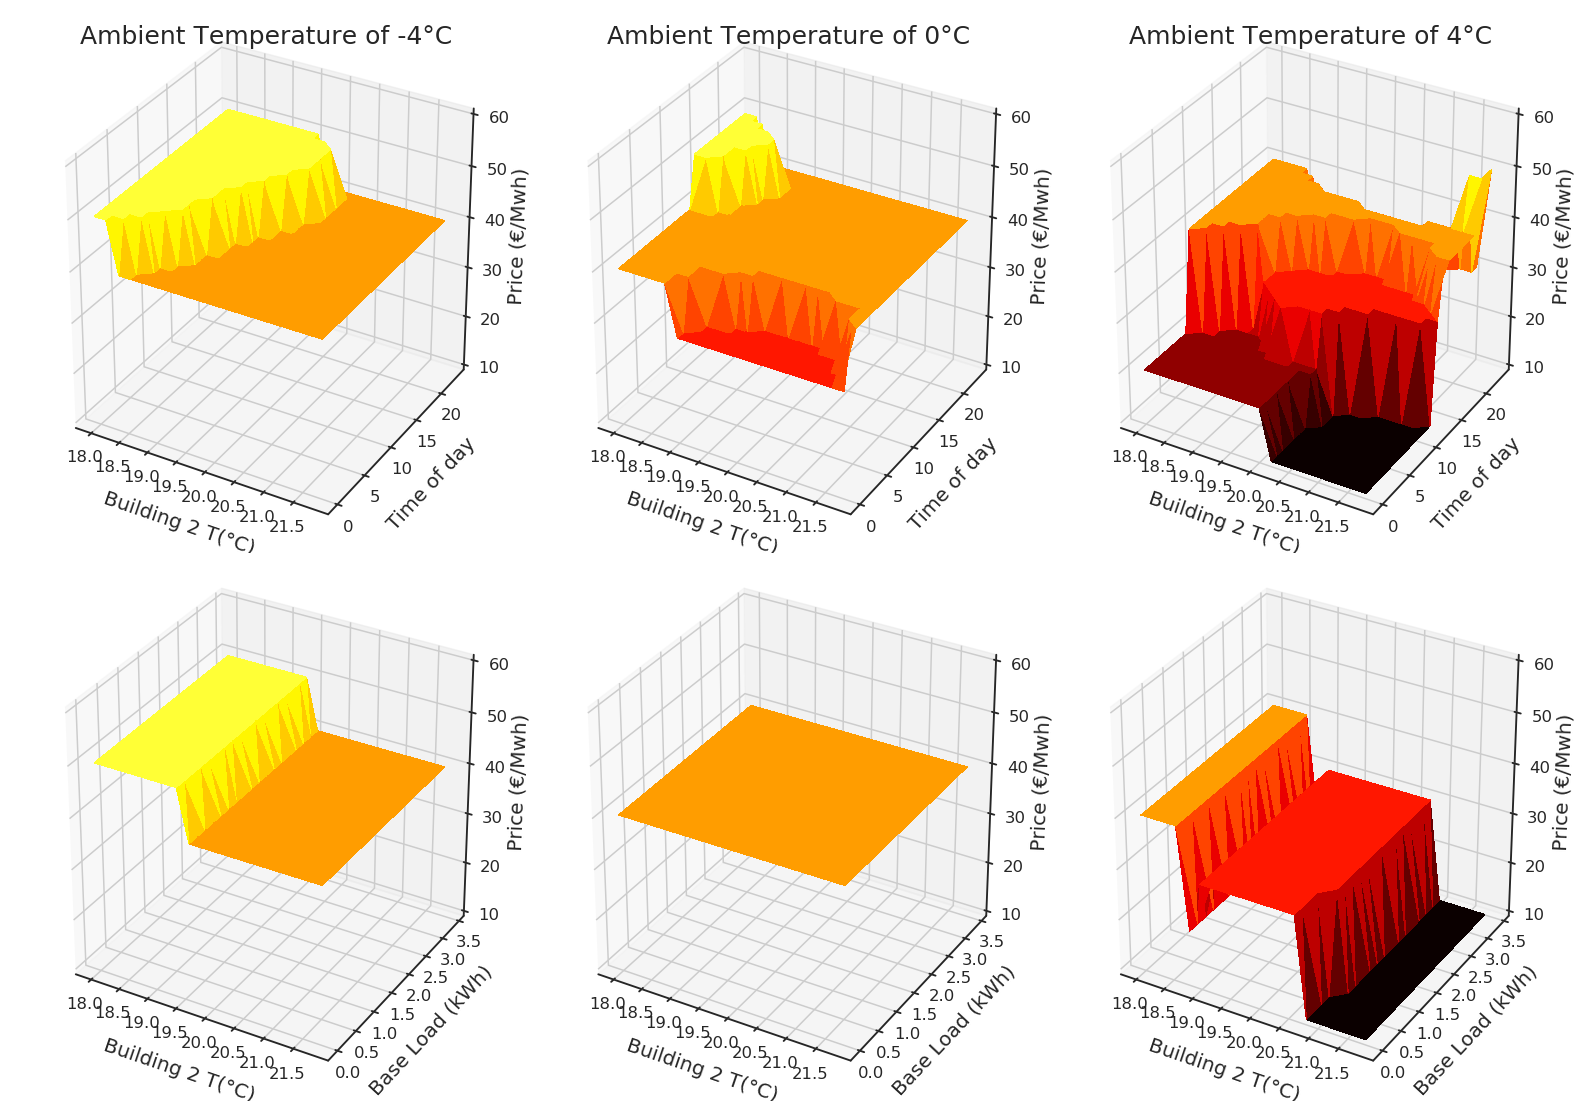

In [47]:
import numpy as np
fig = plt.figure(figsize=(28,20))

selected_temperatures = [-4, 0, 4]
selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 20.) & (policy_data['Loads'] == 2.0)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 2']
    Y = selected['Times']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Building 2 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Time of day', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)


selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 20.) & (policy_data['Times'] == 11)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 2']
    Y = selected['Loads']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+4, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    #ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Building 2 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)

    
plt.subplots_adjust(wspace=0.01, hspace = 0.01)
    
plt.savefig('data/output/RLbuildings/Lowerload/Zeta0.1_policy_eval_3D.png',bbox_inches='tight')

# Building Scale Up

In [25]:
data = pkl.load(open('data/output/RLBuildings/ScaledUp/0676007_dynamic_True_rewards_dqn.pkl', "rb"))
data[-1]

{'NUM_EPISODES': 4000,
 'EPSILON': 1,
 'EPS_DECAY': 0.999997,
 'LEARNING_RATE_': 0.0001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 64,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 0.5,
 'LOAD_PENALTY': 100,
 'PRICE_PENALTY': 0.05,
 'ZETA': 0.1}

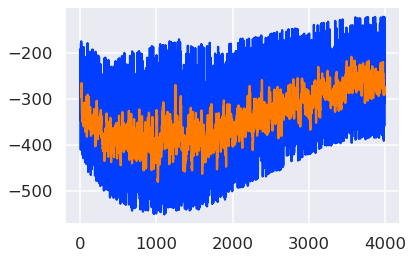

In [26]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

## Evaluation on January

In [90]:
data = pkl.load(open("data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.1_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Deviation from load limit'] = data['Total Load'] - 18
data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data.index = data['Date']
data['Above'] = (data['Total Load'] >= 18)*(data['Total Load']-18)
#data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [91]:
data['Total Price'].sum()

585.2208001781115

In [92]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Actions 1,Actions 2,Ambient Temperatures,Actions,Rewards,Total Load,Total Price,Base Loads,Deviation from load limit,Date,Day,Above
Date,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,21.083931,20.914993,1.125480,1.115002,0.000000,0.000000,2.118,3.0,0.000000,10.435992,0.000000,2.240482,-7.564008,2014-01-01 00:00:00,1,-0.000000
2014-01-01 01:00:00,20.257878,21.385934,1.090279,0.940144,0.340819,0.357404,2.118,3.0,-2.937694,21.216956,0.424339,2.030423,3.216956,2014-01-01 01:00:00,1,3.216956
2014-01-01 02:00:00,19.854413,21.367247,0.760113,0.847293,0.470809,0.466633,2.147,3.0,-2.927773,21.205957,0.424119,1.607406,3.205957,2014-01-01 02:00:00,1,3.205957
2014-01-01 03:00:00,19.586908,21.370987,0.999131,0.775026,0.512637,0.494062,2.324,3.0,-2.367633,20.584959,0.411699,1.774156,2.584959,2014-01-01 03:00:00,1,2.584959
2014-01-01 04:00:00,19.477065,21.360881,0.818620,0.704564,0.540088,0.529426,2.344,3.0,-2.847667,21.117147,0.422343,1.523183,3.117147,2014-01-01 04:00:00,1,3.117147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 20:00:00,18.207154,19.677299,1.317177,1.368474,0.787310,0.800834,-2.605,0.0,-15.822541,31.383318,1.726083,2.685651,13.383318,2014-01-31 20:00:00,31,13.383318
2014-01-31 21:00:00,18.714151,19.990115,1.312423,1.424184,0.999876,0.999859,-2.735,5.0,-18.058010,33.641068,0.168205,2.736606,15.641068,2014-01-31 21:00:00,31,15.641068
2014-01-31 22:00:00,19.150273,20.277541,1.049033,1.270185,0.996074,0.996139,-2.760,5.0,-15.086891,33.064948,0.991948,2.319219,15.064948,2014-01-31 22:00:00,31,15.064948


In [93]:
PRICE_SET =  [5,10,15,20,25,30,35,40,45,50,55,60]##[i for i in range(61)]#[5,10,15,20,25,30,35,40,45,50,55,60] #[10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
    #return x*60
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [94]:
data_base = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.130base_eval.pkl', "rb"))

In [95]:
data_base_10 = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.15_base_eval.pkl', "rb")) #data/output/RLBuildings/ScaledUp/0532640_base_eval.pkl

In [96]:
data_base_tou = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.1_ToU_base_eval.pkl', "rb"))

In [97]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 18)*(data_base['Total Load']-18)
data_base['Deviation from load limit'] = data_base['Total Load']-18
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base.index = data_base['Date']
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [98]:
data_base_10['Total Load'] = data_base_10['Total Load']*1000
data_base_10['Base Loads 1'] = data_base_10['Base Loads 1']*1000
data_base_10['Base Loads 2'] = data_base_10['Base Loads 2']*1000
data_base_10['Base Loads'] = data_base_10['Base Loads 1'] + data_base_10['Base Loads 2']
data_base_10['Above'] = (data_base_10['Total Load'] >= 18)*(data_base_10['Total Load']-18)
data_base_10['Deviation from load limit'] = data_base_10['Total Load']-18
data_base_10['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base_10.index = data_base_10['Date']
data_base_10['Day'] = data_base_10['Date'].dt.day

In [99]:
data_base_tou['Total Load'] = data_base_tou['Total Load']*1000
data_base_tou['Base Loads 1'] = data_base_tou['Base Loads 1']*1000
data_base_tou['Base Loads 2'] = data_base_tou['Base Loads 2']*1000
data_base_tou['Base Loads'] = data_base_tou['Base Loads 1'] + data_base_tou['Base Loads 2']
#data_base_tou['Above'] = (data_base_10['Total Load'] >= 18)*(data_base_10['Total Load']-18)
#data_base_tou['Deviation from load limit'] = data_base_10['Total Load']-18
data_base_tou['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base_tou.index = data_base_tou['Date']
data_base_tou['Day'] = data_base_tou['Date'].dt.day

In [24]:
data_base_tou

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Ambient Temperatures,Rewards,Total Load,Total Price,Prices,Base Loads,Date,Day
Date,,,,,,,,,,,,
2014-01-01 00:00:00,21.048814,20.917022,1.048795,0.933013,2.118,0.000000,10.435992,0.000000,30,1.981808,2014-01-01 00:00:00,1
2014-01-01 01:00:00,19.966502,20.016555,1.090279,0.940144,2.118,-0.892339,18.928393,0.567852,30,2.030423,2014-01-01 01:00:00,1
2014-01-01 02:00:00,19.451276,19.617132,0.760113,0.847293,2.147,-2.689106,20.918168,0.627545,30,1.607406,2014-01-01 02:00:00,1
2014-01-01 03:00:00,19.224895,19.306721,0.999131,0.775026,2.324,-2.272056,20.456318,0.613690,30,1.774156,2014-01-01 03:00:00,1
2014-01-01 04:00:00,19.168444,19.161410,0.818620,0.704564,2.344,-2.634465,20.857658,0.625730,30,1.523183,2014-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 20:00:00,18.782725,18.859579,1.317177,1.368474,-2.605,-15.396600,33.480466,1.339219,40,2.685651,2014-01-31 20:00:00,31
2014-01-31 21:00:00,18.970380,18.983251,1.312423,1.424184,-2.735,-13.530853,31.982959,1.279318,40,2.736606,2014-01-31 21:00:00,31
2014-01-31 22:00:00,19.087880,19.085732,1.049033,1.270185,-2.760,-11.879319,31.001895,1.240076,30,2.319219,2014-01-31 22:00:00,31


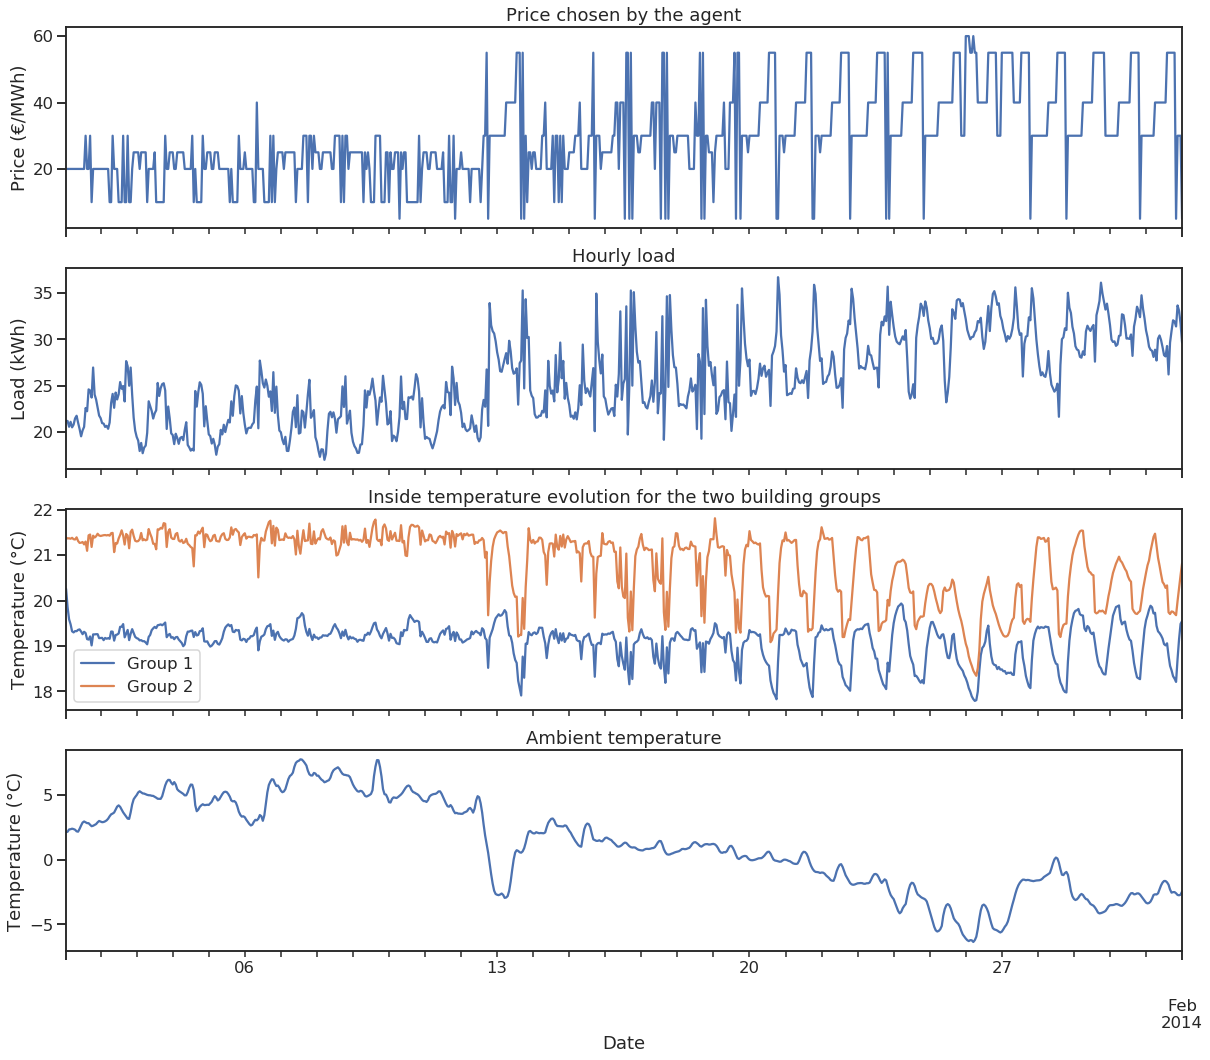

In [103]:
one_week = data.iloc[1:,:]
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Total Load'].plot(ax=ax[1])
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

#data_base.iloc[1:,:]['Deviation from load limit'].plot(ax=ax[1],c='r', linestyle = 'dotted')
#data_base_10.iloc[1:,:]['Deviation from load limit'].plot(ax=ax[1],c='g', linestyle = 'dotted')
#ax[1].legend(["Dynamic Prices", "Static price at 30€/MWh", "Static price at 10€/MWh"])
ax[1].set_ylabel('Load (kWh)')
ax[1].set_title('Hourly load')

one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2])
ax[2].legend(["Group 1", "Group 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two building groups')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
plt.savefig('data/output/RLBuildings/ten_buildings_eval.png',bbox_inches='tight')

Text(0.5, 1.0, 'Ambient temperature')

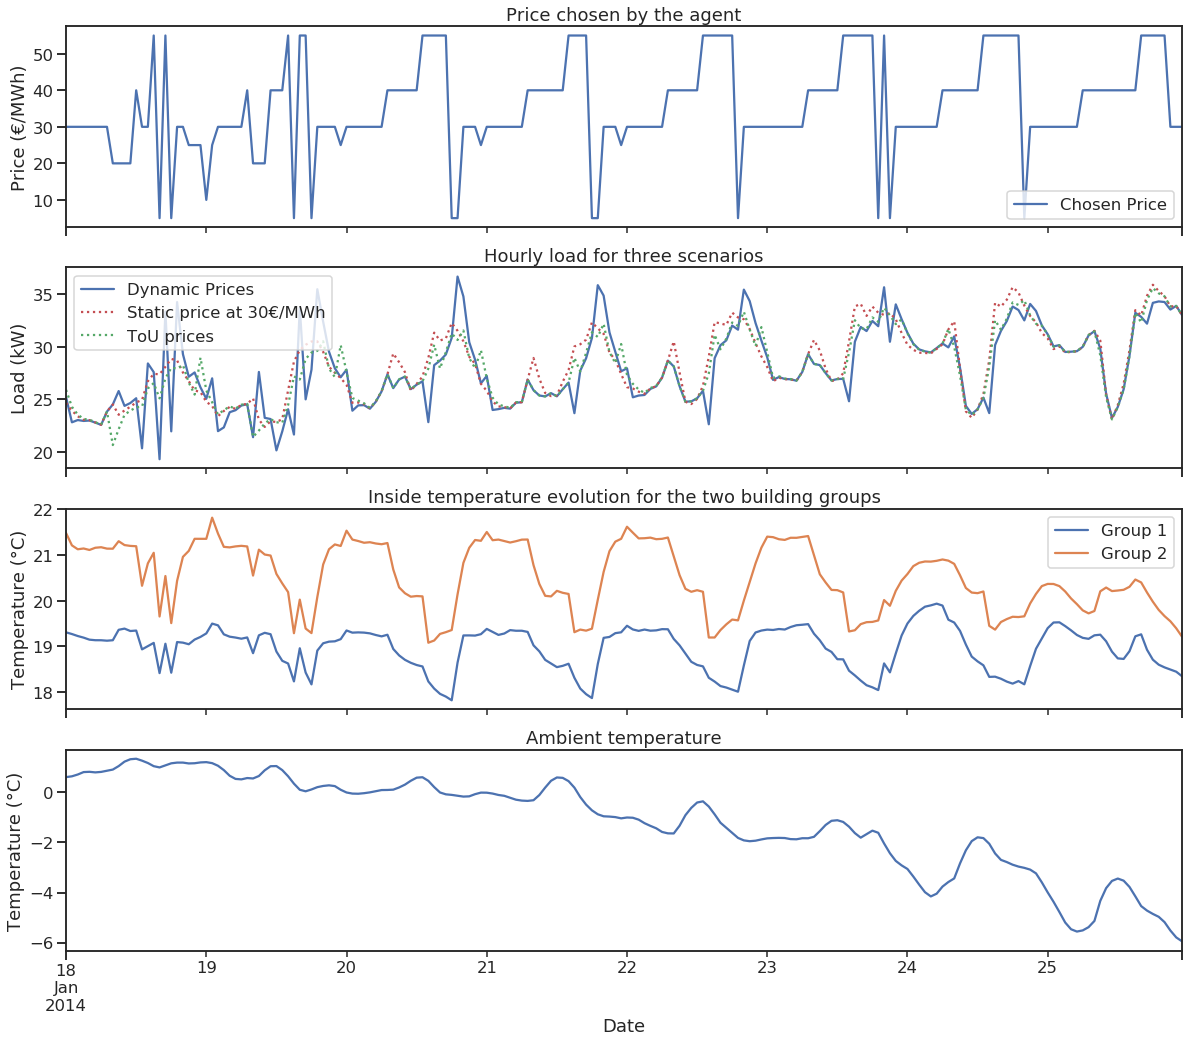

In [101]:
one_week = data.iloc[17*24:25*24,:]
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0], legend=True)
one_week['Total Load'].plot(ax=ax[1])
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

data_base.iloc[17*24:25*24,:]['Total Load'].plot(ax=ax[1],c='r', linestyle = 'dotted')
data_base_tou.iloc[17*24:25*24,:]['Total Load'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Dynamic Prices", "Static price at 30€/MWh", "ToU prices"])
ax[1].set_ylabel('Load (kW)')
ax[1].set_title('Hourly load for three scenarios')


one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2])
ax[2].legend(["Group 1", "Group 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two building groups')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
#plt.savefig('data/output/RLBuildings/ten_buildings_eval_zoom.png',bbox_inches='tight')

# Evaluation against baselines

### In terms of paid price

In [28]:
model_paid_price = data['Total Price'].sum()
static_paid_price = data_base['Total Price'].sum()
tou_paid_price = data_base_tou['Total Price'].sum()

585.2208001781115

### In terms of load

In [31]:
model_load = data['Total Load'].sum()
static_price_load = data_base['Total Load'].sum()
tou_load = data_base_tou['Total Load'].sum()

19190.052801832324

### In terms of temperature discomfort

In [38]:
data.iloc[0,0] = 21.0839
data.iloc[0,1] = 20.9150

In [46]:
data['Temperature Deviation 1'] = data['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data['Temperature Deviation 2'] = data['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

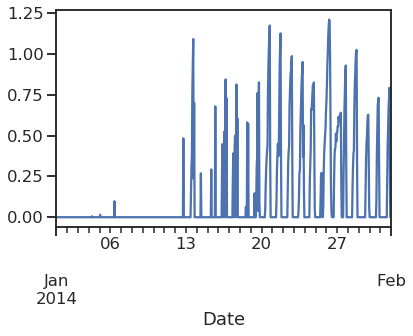

In [48]:
data['Temperature Deviation 1'].plot()

In [53]:
data['Temperature Deviation 1'].mean()

0.12877145138031984

In [49]:
data_base_tou

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Ambient Temperatures,Rewards,Total Load,Total Price,Prices,Base Loads,Date,Day
Date,,,,,,,,,,,,
2014-01-01 00:00:00,21.048814,20.917022,1.048795,0.933013,2.118,0.000000,10.435992,0.000000,30,1.981808,2014-01-01 00:00:00,1
2014-01-01 01:00:00,19.966502,20.016555,1.090279,0.940144,2.118,-0.892339,18.928393,0.567852,30,2.030423,2014-01-01 01:00:00,1
2014-01-01 02:00:00,19.451276,19.617132,0.760113,0.847293,2.147,-2.689106,20.918168,0.627545,30,1.607406,2014-01-01 02:00:00,1
2014-01-01 03:00:00,19.224895,19.306721,0.999131,0.775026,2.324,-2.272056,20.456318,0.613690,30,1.774156,2014-01-01 03:00:00,1
2014-01-01 04:00:00,19.168444,19.161410,0.818620,0.704564,2.344,-2.634465,20.857658,0.625730,30,1.523183,2014-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 20:00:00,18.782725,18.859579,1.317177,1.368474,-2.605,-15.396600,33.480466,1.339219,40,2.685651,2014-01-31 20:00:00,31
2014-01-31 21:00:00,18.970380,18.983251,1.312423,1.424184,-2.735,-13.530853,31.982959,1.279318,40,2.736606,2014-01-31 21:00:00,31
2014-01-31 22:00:00,19.087880,19.085732,1.049033,1.270185,-2.760,-11.879319,31.001895,1.240076,30,2.319219,2014-01-31 22:00:00,31


In [50]:
data_base_tou['Temperature Deviation 1'] = data_base_tou['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base_tou['Temperature Deviation 2'] = data_base_tou['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

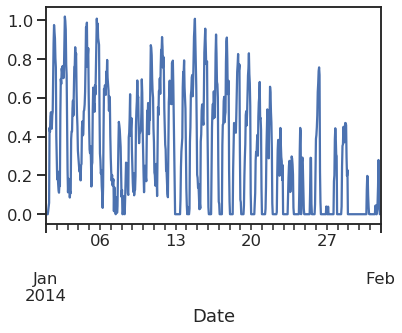

In [51]:
data_base_tou['Temperature Deviation 1'].plot()

In [52]:
data_base_tou['Temperature Deviation 1'].mean()

0.306909828254776

In [54]:
data_base['Temperature Deviation 1'] = data_base['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base['Temperature Deviation 2'] = data_base['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

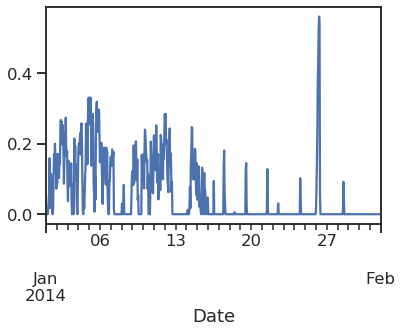

In [55]:
data_base['Temperature Deviation 1'].plot()

In [56]:
data_base['Temperature Deviation 1'].mean()

0.05511781561155838

### Graphs

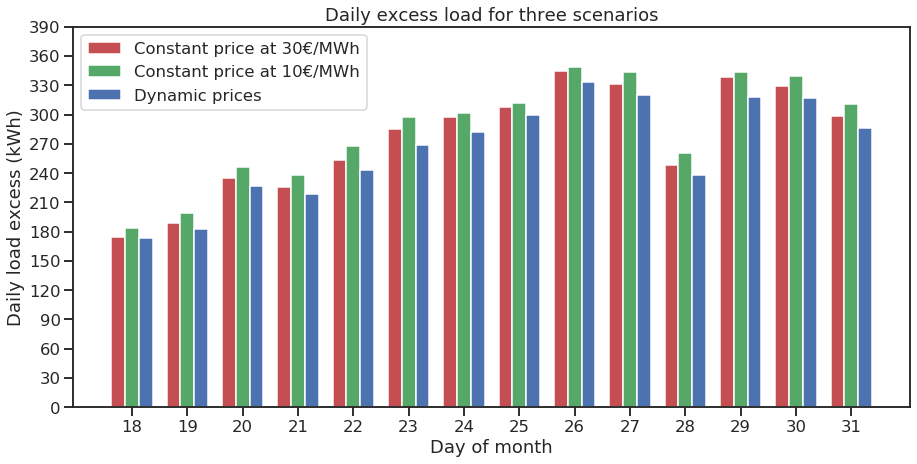

In [16]:
base_30_excess = data_base.groupby('Day')['Above'].sum().values[17:]
base_10_excess = data_base_10.groupby('Day')['Above'].sum().values[17:]
model_excess = data.groupby('Day')['Above'].sum().values[17:]

N=len(model_excess)
ind = np.arange(N)+18
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, base_30_excess, color = 'r', width = 0.25)
axs.bar(ind ,base_10_excess , color = 'g', width = 0.25)
axs.bar(ind + 0.25,model_excess , color = 'b', width = 0.25)
axs.legend(['Constant price at 30€/MWh', 'Constant price at 10€/MWh', 'Dynamic prices'])
axs.set_ylabel('Daily load excess (kWh)')
axs.set_xlabel('Day of month')
axs.set_yticks(np.arange(0, 420, 30))
axs.set_title('Daily excess load for three scenarios')
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)
plt.savefig('data/output/RLBuildings/ten_buildings_load_eval.png',bbox_inches='tight')

# Policy evaluation

In [52]:
policy_data = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_RL_Zeta0.1_Scaled_policy_eval.pkl', 'rb'))
policy_data

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions
0,18.0,18.0,-5.0,0,0.0,3.0
1,18.0,18.0,-5.0,1,0.0,3.0
2,18.0,18.0,-5.0,2,0.0,3.0
3,18.0,18.0,-5.0,3,0.0,3.0
4,18.0,18.0,-5.0,4,0.0,3.0
...,...,...,...,...,...,...
28799995,21.8,21.8,4.8,19,29.5,10.0
28799996,21.8,21.8,4.8,20,29.5,7.0
28799997,21.8,21.8,4.8,21,29.5,7.0
28799998,21.8,21.8,4.8,22,29.5,7.0


In [53]:
policy_data['Actions'].unique()

array([ 3.,  0.,  5.,  7., 10.,  9., 11.,  1.,  4.,  6.])

In [54]:
PRICE_SET = [5,10,15,20,25,30,35,40,45,50,55,60]
def extract_price(x):
    #return x*50+10
    return PRICE_SET[int(x)]
policy_data['Chosen Price'] = policy_data['Actions'].map(lambda x: extract_price(x))

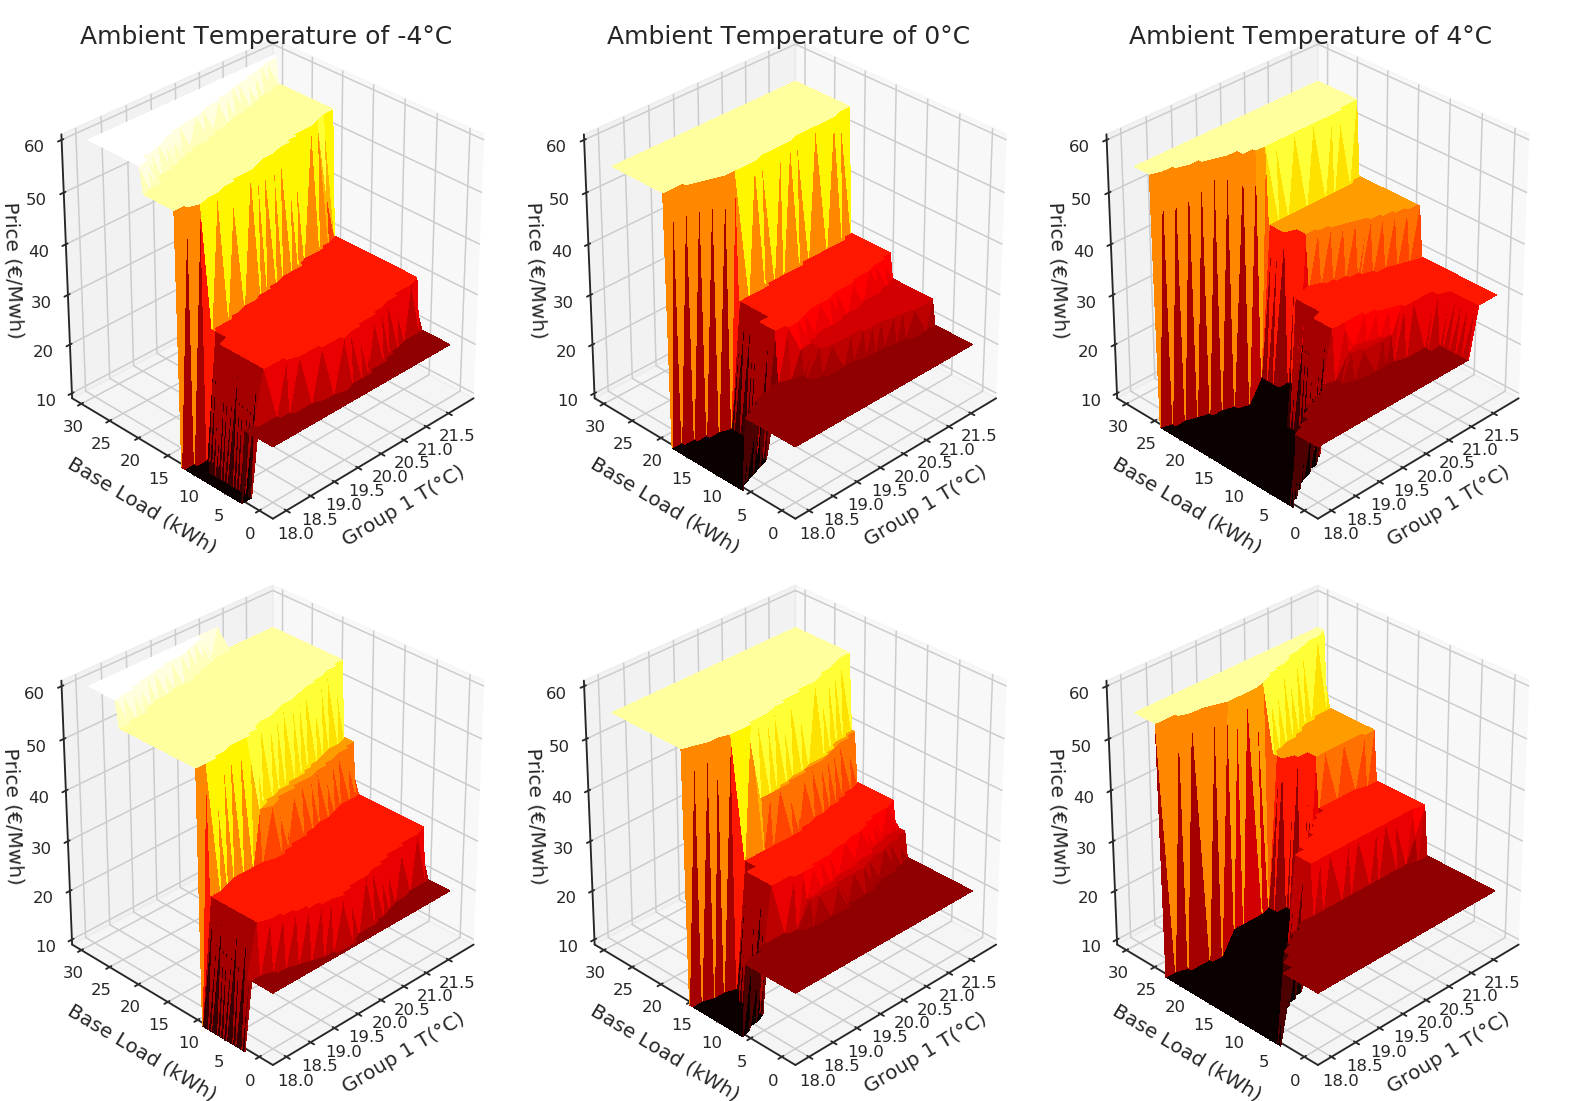

In [95]:
import numpy as np
fig = plt.figure(figsize=(28,20))
time = 20
selected_temperatures = [-4, 0, 4]
selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 2'],1) == 18.) & (policy_data['Times'] == time)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 1']
    Y = selected['Loads']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Group 1 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)
    ax.view_init(elev=30., azim=225)

    
plt.subplots_adjust(wspace=0.01, hspace = 0.01)


selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 2'],1) == 21.) & (policy_data['Times'] == time)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 1']
    Y = selected['Loads']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+4, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    #ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Group 1 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)
    ax.view_init(elev=30., azim=225)

    
plt.subplots_adjust(wspace=0.01, hspace = 0.01)

#selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 21.) & (policy_data['Times'] == 12)]
#
#for i in range(3):
#    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
#    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
#    X = selected['Inside Temperatures 2']
#    Y = selected['Loads']
#    Z = selected['Chosen Price']
#
#    ax = fig.add_subplot(3, 3, i+7, projection='3d')
#
#    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
#                       linewidth=0, antialiased=False, vmin=10, vmax=60)
#    #ax.scatter(X,Y,Z)
#    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
#    #ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
#    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
#    ax.set_xlabel('Building 2 T(°C)', fontsize=20, labelpad=15)
#    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
#    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
#    ax.set_zlim(10, 60)
#    ax.tick_params(axis='z', which='major', pad=10)
#
#    
#plt.subplots_adjust(wspace=0.01, hspace = 0.01)
    
plt.savefig('data/output/RLbuildings/ScaledUp/Zeta0.1_scale_up_policy_eval_3D.png',bbox_inches='tight')